# General likelihood

In [2]:
import numpy as np
import matplotlib.pyplot as plt


Max Log-Likelihood: 38.27 at mu=0.21, sigma=0.11
True Parameters: mu=0.2, sigma=0.1 with LLH = 37.02 

Max Log-Likelihood: 45.72 at mu=0.20, sigma=0.10
True Parameters: mu=0.2, sigma=0.1 with LLH = 45.66 

Max Log-Likelihood: 42.18 at mu=0.18, sigma=0.10
True Parameters: mu=0.2, sigma=0.1 with LLH = 41.62 

Max Log-Likelihood: 44.25 at mu=0.17, sigma=0.10
True Parameters: mu=0.2, sigma=0.1 with LLH = 42.10 

Max Log-Likelihood: 44.90 at mu=0.21, sigma=0.10
True Parameters: mu=0.2, sigma=0.1 with LLH = 44.85 

Max Log-Likelihood: 52.49 at mu=0.21, sigma=0.09
True Parameters: mu=0.2, sigma=0.1 with LLH = 51.02 

Max Log-Likelihood: 42.00 at mu=0.21, sigma=0.11
True Parameters: mu=0.2, sigma=0.1 with LLH = 41.85 

Max Log-Likelihood: 40.07 at mu=0.19, sigma=0.11
True Parameters: mu=0.2, sigma=0.1 with LLH = 39.50 

Max Log-Likelihood: 38.02 at mu=0.21, sigma=0.11
True Parameters: mu=0.2, sigma=0.1 with LLH = 37.18 

Max Log-Likelihood: 44.26 at mu=0.21, sigma=0.10
True Parameters: mu=0.2,

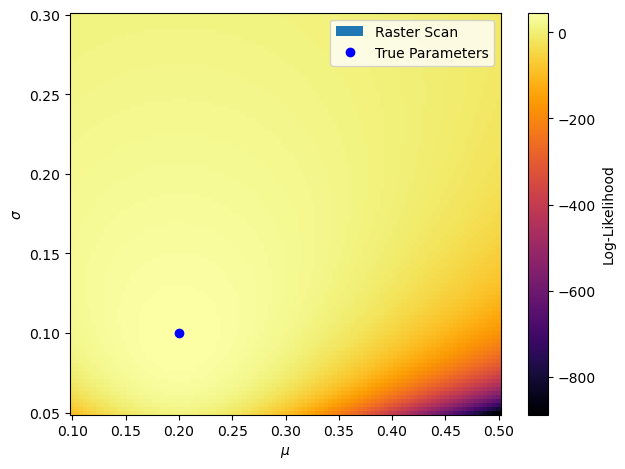

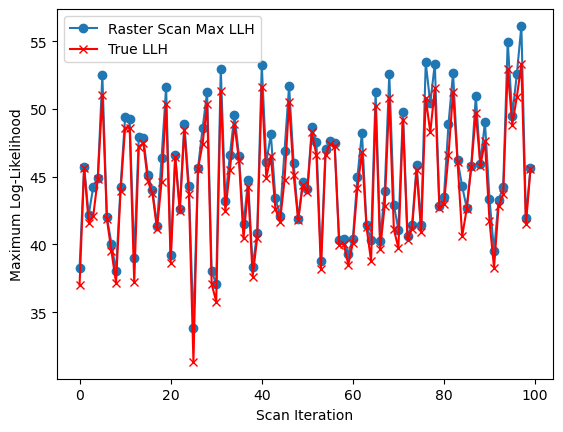

In [3]:
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
def log_likelihood(mu, sigma, data):
    return np.sum(np.log(gaussian(data, mu, sigma)))
max_llhs_scan = []
max_llhs_anal = []
for seed in range(100):
    np.random.seed(seed)
    data = np.random.normal(loc=0.2, scale=0.1, size=50)

    mu = np.linspace(0.1, 0.5, 100)
    sigma = np.linspace(0.05, 0.3, 100)


    lls = []
    for m in mu:
        for s in sigma:
            lls.append(log_likelihood(m, s, data))
    print(f'Max Log-Likelihood: {max(lls):.2f} at mu={mu[np.argmax(lls) // len(sigma)]:.2f}, sigma={sigma[np.argmax(lls) % len(sigma)]:.2f}')
    print(f'True Parameters: mu=0.2, sigma=0.1 with LLH = {log_likelihood(0.2, 0.1, data):.2f}', "\n")
    max_llhs_scan.append(max(lls))
    max_llhs_anal.append(log_likelihood(0.2, 0.1, data))

fig, ax = plt.subplots(1)

c = ax.pcolor(mu, sigma, np.array(lls).reshape(len(mu), len(sigma)).T, shading='auto', cmap='inferno', label = 'Raster Scan')
ax.plot(0.2, 0.1, 'bo', label='True Parameters')
ax.legend(loc = 'upper right')

# plt.text(0.2, 0.1, f'LLH = {}', color='blue', fontsize=9, verticalalignment='bottom', horizontalalignment='left')
fig.colorbar(c, ax=ax, label='Log-Likelihood')
# ax.set_title('Raster Scan')
ax.set_xlabel('$\\mu$')
ax.set_ylabel('$\\sigma$')


fig.tight_layout()
plt.show()


plt.plot(max_llhs_scan, marker='o', label = 'Raster Scan Max LLH')
# plt.axhline(y=log_likelihood(0.2, 0.1, data), color='r', linestyle='--', label='True LLH')
plt.plot(max_llhs_anal, marker = 'x', color='r', label='True LLH')
plt.legend()
plt.xlabel('Scan Iteration')
plt.ylabel('Maximum Log-Likelihood');

# Exercise 2

In [73]:
from scipy.optimize import minimize, curve_fit
from scipy import integrate

In [ ]:
def pred(x, alpha, beta):
    return 1 + alpha * x + beta * x**2
# normal_const = integrate.quad(lambda x: pred(x, 0.5, 0.5), -1, 1)[0]
pred_normalized = lambda x, alpha, beta: pred(x, alpha, beta) / integrate.quad(lambda x: pred(x, alpha, beta), -1, 1)[0]
np.random.seed(42)
xs = np.random.uniform(-1, 1, 2000)

np.savetxt('alpha0_5beta0_5.csv', np.column_stack((xs, pred_normalized(xs, 0.5, 0.5))), delimiter=',', header='x,y', comments='')

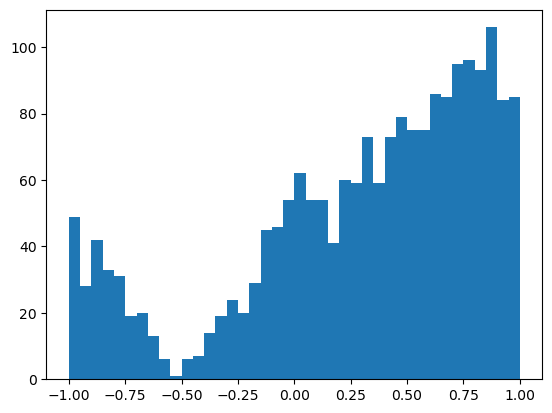

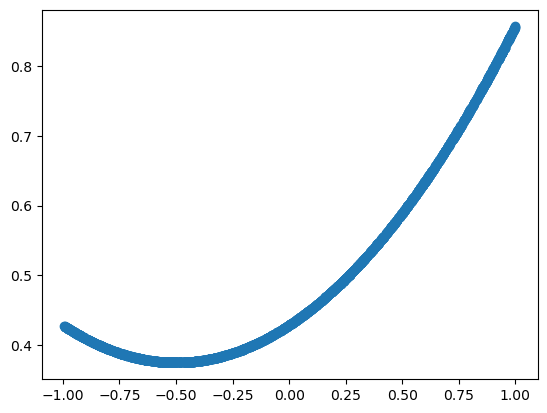

In [154]:
#accept/reject
sampled = []
while len(sampled) < 2000:
    # x = np.random.uniform(-1, 1)
    x_index = np.random.randint(0, len(xs))
    random_nr = np.random.uniform(-1, 1)
    y = pred_normalized(random_nr, 0.5, 0.5)
    if y > pred_normalized(xs[x_index], 0.5, 0.5):
        sampled.append(random_nr)
plt.hist(sampled, bins = 40)
plt.show()
plt.scatter(xs, pred_normalized(xs, 0.5, 0.5), label='True Distribution');

In [ ]:
# print(min(sampled))

-0.9998134639575142


In [184]:
def log_likelihood_poly(x, data):   
    # print(np.min(pred_normalized(data, x[0], x[1])))
    # print(x)
    # print(-np.sum(np.log(pred_normalized(data, x[0], x[1]))))
    data_points = pred_normalized(data, x[0], x[1])
    if np.min(data_points) <= 0:
        return np.inf
    return -np.sum(np.log(data_points))

res = minimize(log_likelihood_poly, x0=[0.5, 1], args = (np.asarray(sampled)))#, bounds=[(0, 10), (0, 10)])
res.x

c:\Users\lorentsen\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


array([1.32587069, 1.11498386])

C:\Users\lorentsen\AppData\Local\Temp\ipykernel_155796\2372356189.py:13: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(c, ax=ax, label='Log-Likelihood')


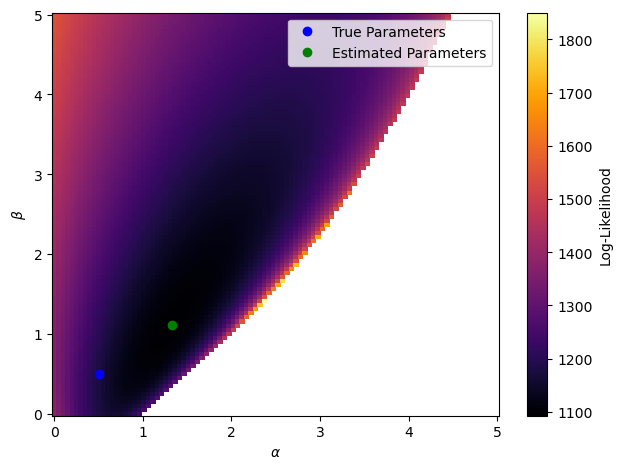

In [182]:
lambdas = (np.linspace(0, 5, 100), np.linspace(0, 5, 100))
lls = []
for alpha in lambdas[0]:
    for beta in lambdas[1]:
        lls.append(log_likelihood_poly([alpha, beta], np.asarray(sampled)))
        
fig, ax = plt.subplots(1)
c = ax.pcolor(lambdas[0], lambdas[1], np.array(lls).reshape(len(lambdas[0]), len(lambdas[1])).T, shading='auto', cmap='inferno')
ax.plot(0.5, 0.5, 'bo', label='True Parameters')

ax.plot(res.x[0], res.x[1], 'go', label='Estimated Parameters')
ax.legend(loc = 'upper right')
fig.colorbar(c, ax=ax, label='Log-Likelihood')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
fig.tight_layout()

plt.show()
